# Libraries

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot') #style of plots

#to plot in this notebook
%matplotlib inline

#legends
legendHDA = ['Home','Draw','Away']
legendFMU = ['Favorite','Medium','Underdog']

# Probability Results
* By Location (Home / Draw / Away)
* By Odds (Favorite / Medium / Underdog)

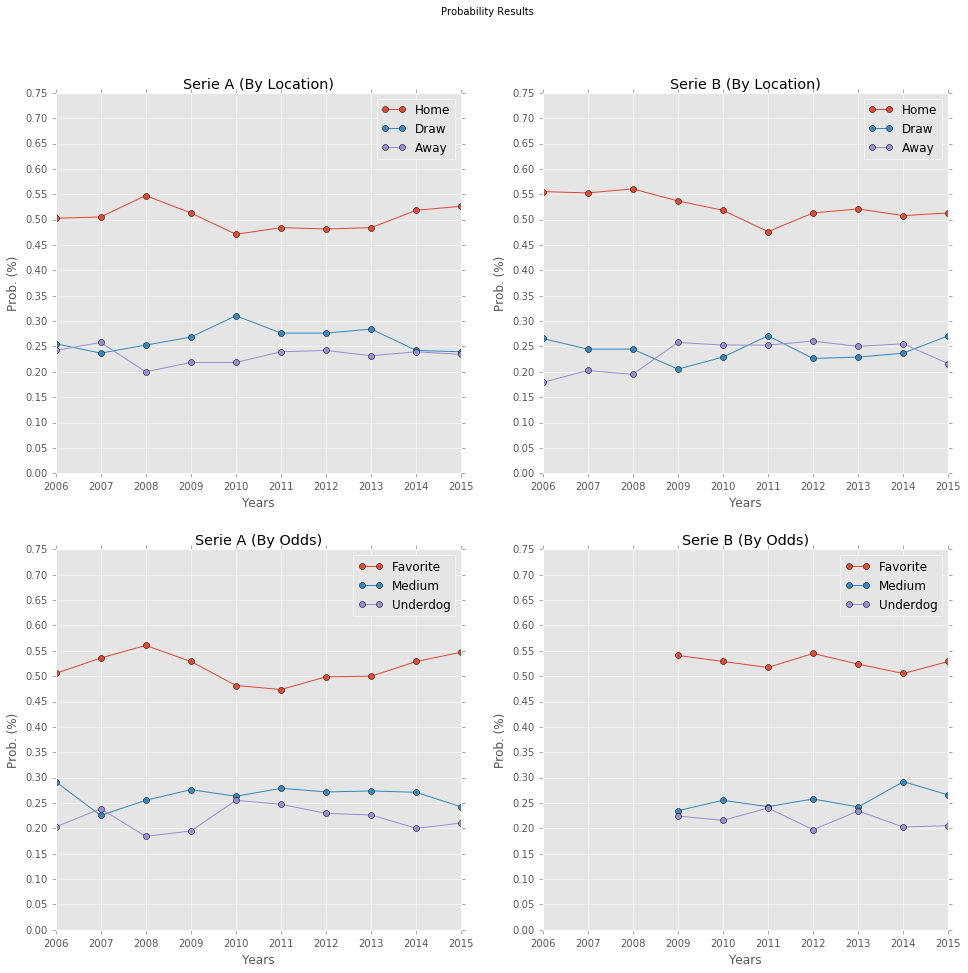

In [13]:
serieA =  pd.read_csv("csv/serieA_matches.csv") 
serieB =  pd.read_csv("csv/serieB_matches.csv") 

serieA.index = pd.to_datetime(serieA.YR,format='%Y')
serieB.index = pd.to_datetime(serieB.YR,format='%Y')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_figwidth(16)
fig.set_figheight(15)

yticks= np.arange(0,0.8,0.05)
xticks = pd.to_datetime(np.arange(2006,2016,1),format='%Y')

def plotAx(df, ax,title, legend):
    ax.plot(df, marker='o')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_xlabel("Years")
    ax.set_ylabel("Prob. (%)")
    ax.set_title(title)
    ax.legend(legend, loc='best')

plotAx(serieA[['PCT_H','PCT_D','PCT_A']],ax1,'Serie A (By Location)',legendHDA)
plotAx(serieB[['PCT_H','PCT_D','PCT_A']],ax2,'Serie B (By Location)',legendHDA)
plotAx(serieA[['PCT_F','PCT_M','PCT_U']],ax3,'Serie A (By Odds)',legendFMU)
plotAx(serieB[['PCT_F','PCT_M','PCT_U']][3:],ax4,'Serie B (By Odds)',legendFMU)

fig.suptitle("Probability Results")
plt.show()

# Probability Results (Variation)
* By Location (Home / Draw / Away)
* By Odds (Favorite / Medium / Underdog)

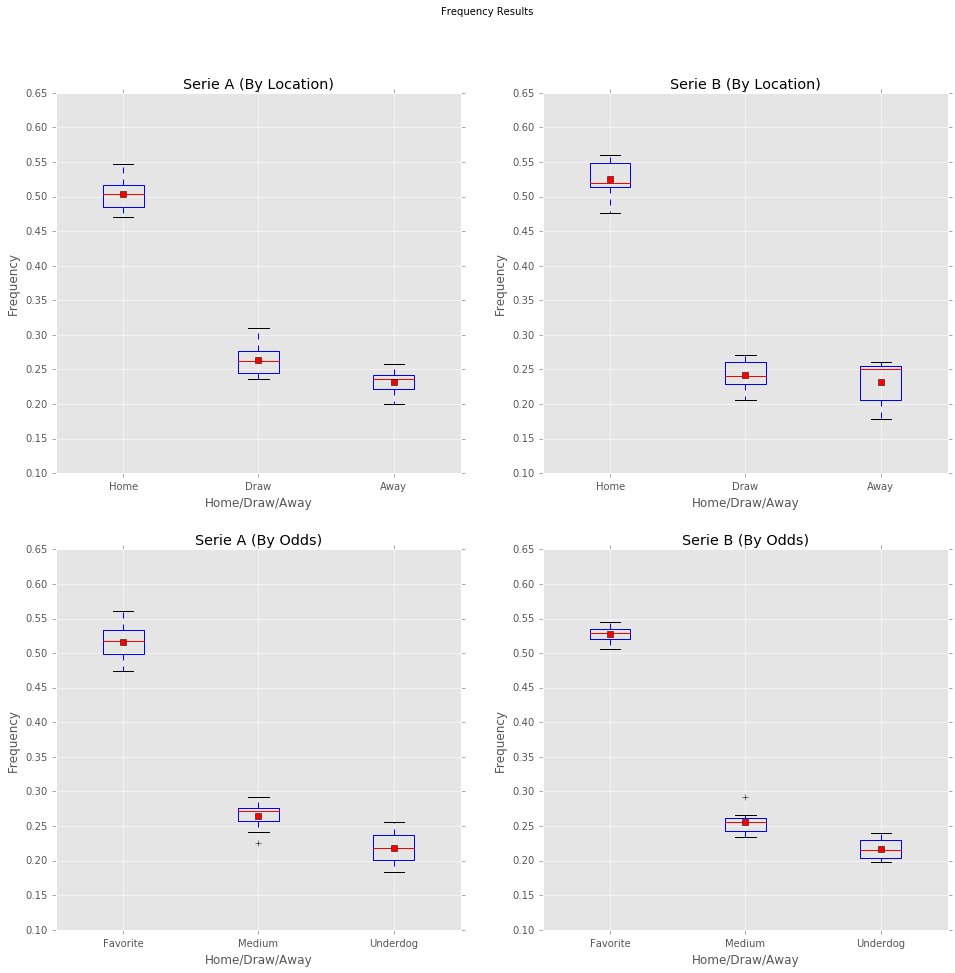

In [23]:
serieA =  pd.read_csv("csv/serieA_matches.csv") 
serieB =  pd.read_csv("csv/serieB_matches.csv") 

series = pd.concat([serieA,serieB])

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_figwidth(16)
fig.set_figheight(15)

yticks= np.arange(0.1,0.7,0.05)

def plotAx(df, ax, title, legend):
    ax.boxplot(df, showmeans=True)
    ax.set_xticklabels(legend)
    ax.set_xlabel("Home/Draw/Away")
    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.set_yticks(yticks)
    
plotAx((serieA['PCT_H'],serieA['PCT_D'],serieA['PCT_A']),
       ax1,'Serie A (By Location)',legendHDA)
plotAx((serieB['PCT_H'],serieB['PCT_D'],serieB['PCT_A']),
       ax2,'Serie B (By Location)',legendHDA)
plotAx((serieA['PCT_F'],serieA['PCT_M'],serieA['PCT_U']),
       ax3,'Serie A (By Odds)', legendFMU)
plotAx((serieB['PCT_F'][3:],serieB['PCT_M'][3:],serieB['PCT_U'][3:]),
       ax4,'Serie B (By Odds)',legendFMU)

fig.suptitle("Probabilty Results")
plt.show()

# Probability/Loss by Year
* By Location (Home / Draw / Away)
* By Odds (Favorite / Medium / Underdog)

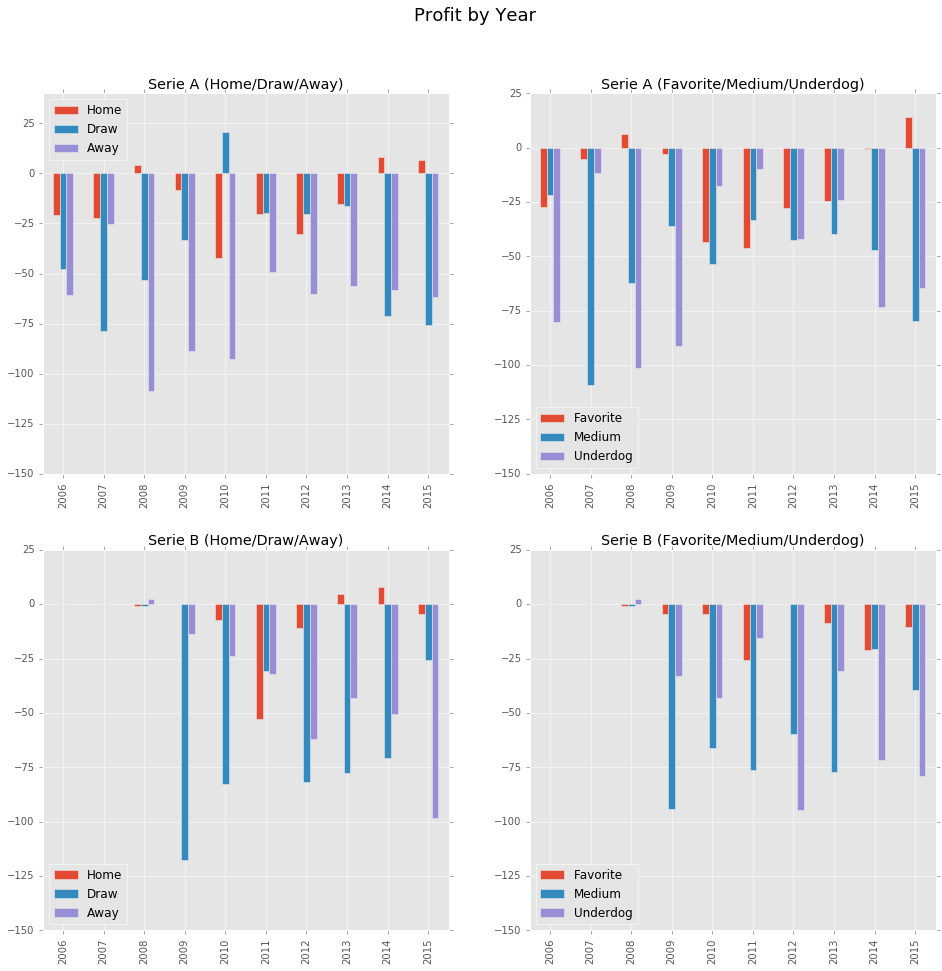

In [4]:
serieA =  pd.read_csv("csv/serieA_matches.csv") 
serieB =  pd.read_csv("csv/serieB_matches.csv") 

xvalues = np.arange(2006,2016,1)
yticks = np.arange(-150,50,25)
        
fig, ((ax11,ax12), (ax21, ax22)) = plt.subplots(2,2)
fig.set_figwidth(16)
fig.set_figheight(15)

ax11.set_title("Serie A (Home/Draw/Away)")
ax12.set_title("Serie A (Favorite/Medium/Underdog)")
ax21.set_title("Serie B (Home/Draw/Away)")
ax22.set_title("Serie B (Favorite/Medium/Underdog)")

serieA[['PLH','PLD','PLA']].plot(ax=ax11, kind='bar', x=xvalues, yticks=yticks)
serieB[['PLH','PLD','PLA']].plot(ax=ax21, kind='bar',  x=xvalues, yticks=yticks)
serieA[['PLF','PLM','PLU']].plot(ax=ax12, kind='bar',  x=xvalues, yticks=yticks)
serieB[['PLF','PLM','PLU']].plot(ax=ax22, kind='bar',  x=xvalues, yticks=yticks)

legendHDA = ['Home','Draw','Away']
legendMDU = ['Favorite','Medium','Underdog']

ax11.legend(legendHDA,loc='best')
ax21.legend(legendHDA,loc='best')
ax12.legend(legendMDU,loc='best')
ax22.legend(legendMDU,loc='best')

fig.suptitle("Profit/Loss by Year",  fontsize=18)
plt.show()

# Cumulative Probability/Loss by Year
* By Location (Home / Draw / Away) - Average Odds e Maximum
* By Odds (Favorite / Medium / Underdog)

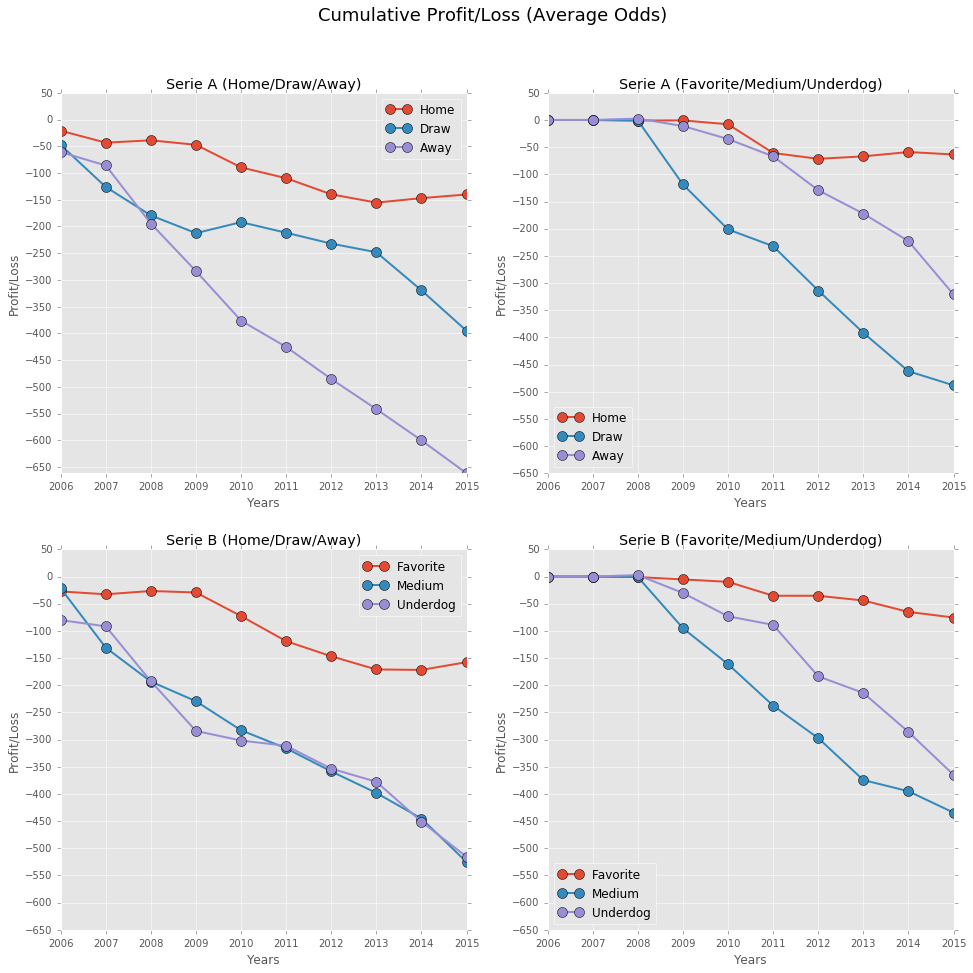

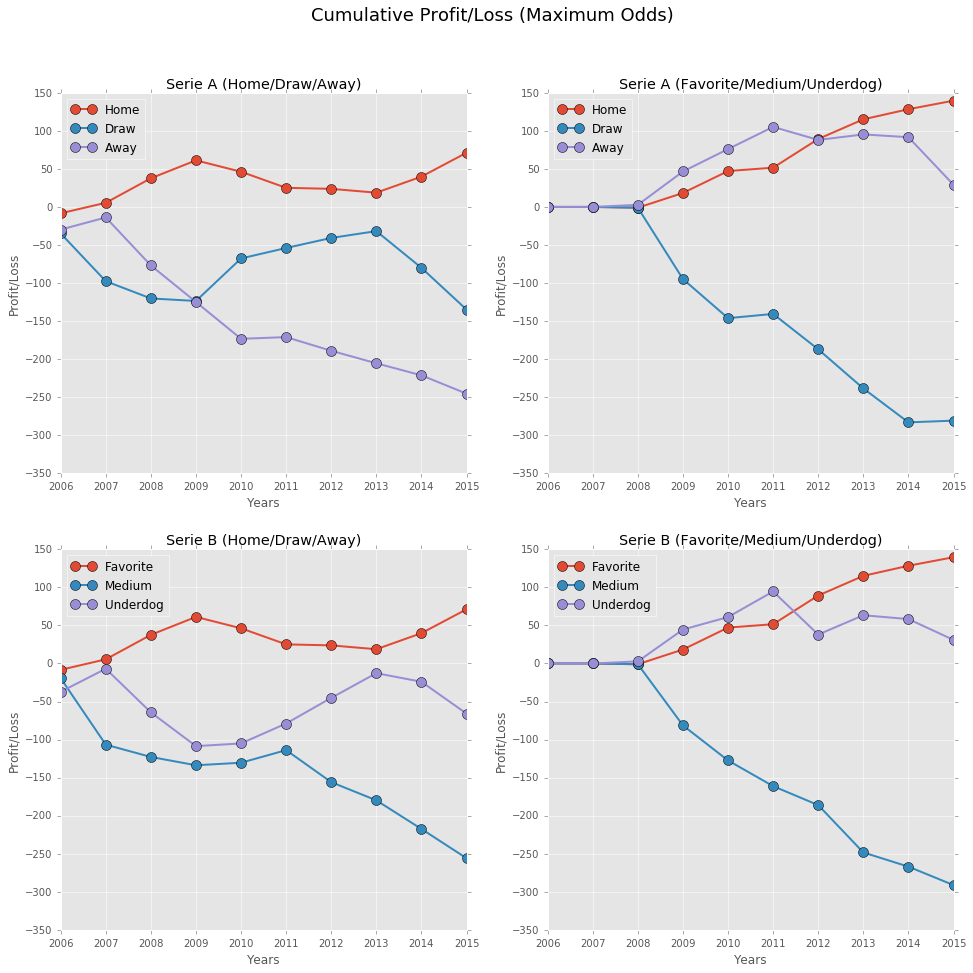

In [94]:
serieA =  pd.read_csv("csv/serieA_matches.csv") 
serieB =  pd.read_csv("csv/serieB_matches.csv") 

xticks = np.arange(2006,2016,1)    
yticks = np.arange(-650,100,50)
    
def plotAx(ax,data):
    ax.plot(data, marker='o', markersize=10, lw='2')
    ax.set_xticklabels(xticks)
    ax.set_yticks(yticks)
    ax.set_xlabel("Years")
    ax.set_ylabel("Profit/Loss")
    
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_figwidth(16)
fig.set_figheight(15)

ax1.set_title("Serie A (Home/Draw/Away)")
ax2.set_title("Serie A (Favorite/Medium/Underdog)")
plotAx(ax1,serieA['CH_AVG'])
plotAx(ax1,serieA['CD_AVG'])
plotAx(ax1,serieA['CA_AVG'])

plotAx(ax2,serieB['CH_AVG'])
plotAx(ax2,serieB['CD_AVG'])
plotAx(ax2,serieB['CA_AVG'])

ax3.set_title("Serie B (Home/Draw/Away)")
ax4.set_title("Serie B (Favorite/Medium/Underdog)")
plotAx(ax3,serieA['CF_AVG'])
plotAx(ax3,serieA['CM_AVG'])
plotAx(ax3,serieA['CU_AVG'])

plotAx(ax4,serieB['CF_AVG'])
plotAx(ax4,serieB['CM_AVG'])
plotAx(ax4,serieB['CU_AVG'])

ax1.legend(legendHDA,loc='best')
ax2.legend(legendHDA,loc='best')
ax3.legend(legendFMU,loc='best')
ax4.legend(legendFMU,loc='best')

fig.suptitle("Cumulative Profit/Loss (Average Odds)",  fontsize=18)
plt.show()

xticks = np.arange(2006,2016,1)    
yticks = np.arange(-350,200,50)
       
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_figwidth(16)
fig.set_figheight(15)

ax1.set_title("Serie A (Home/Draw/Away)")
ax2.set_title("Serie A (Favorite/Medium/Underdog)")
plotAx(ax1,serieA['CH_MAX'])
plotAx(ax1,serieA['CD_MAX'])
plotAx(ax1,serieA['CA_MAX'])

plotAx(ax2,serieB['CH_MAX'])
plotAx(ax2,serieB['CD_MAX'])
plotAx(ax2,serieB['CA_MAX'])

ax3.set_title("Serie B (Home/Draw/Away)")
ax4.set_title("Serie B (Favorite/Medium/Underdog)")
plotAx(ax3,serieA['CF_MAX'])
plotAx(ax3,serieA['CM_MAX'])
plotAx(ax3,serieA['CU_MAX'])

plotAx(ax4,serieB['CF_MAX'])
plotAx(ax4,serieB['CM_MAX'])
plotAx(ax4,serieB['CU_MAX'])

ax1.legend(legendHDA,loc='best')
ax2.legend(legendHDA,loc='best')
ax3.legend(legendFMU,loc='best')
ax4.legend(legendFMU,loc='best')
 
fig.suptitle("Cumulative Profit/Loss (Maximum Odds)",  fontsize=18)
plt.show()

# How many points is a goal worth?
* Anywhere
* Home/Away

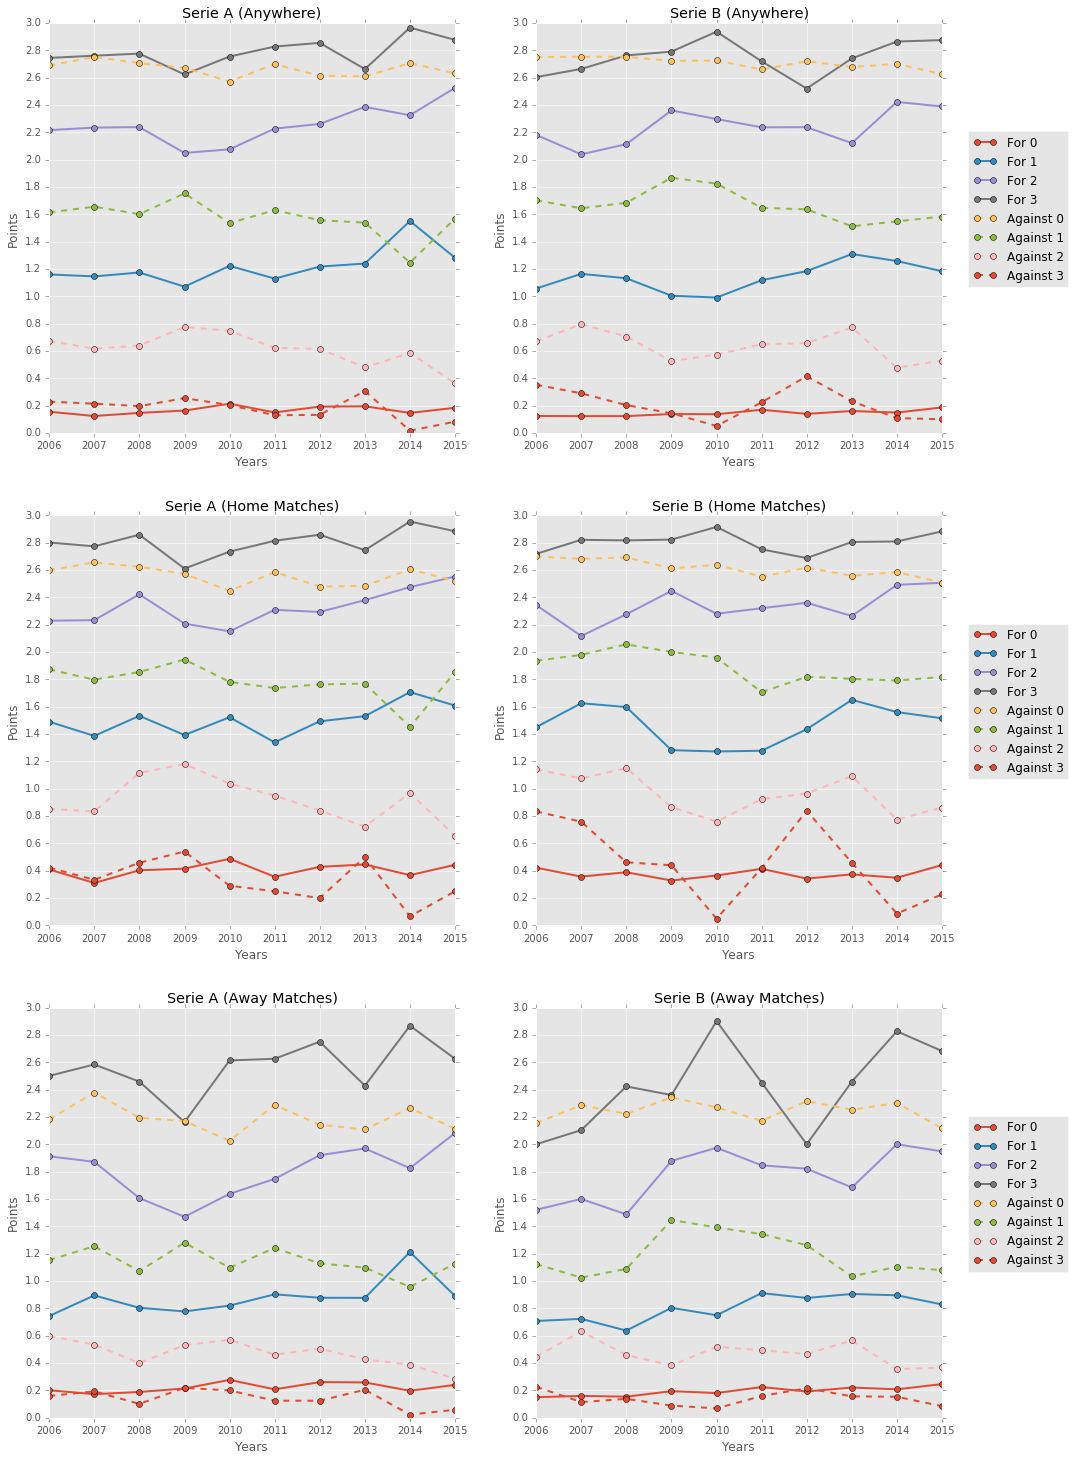

In [99]:
serieA =  pd.read_csv("csv/serieA_by_year.csv") 
serieB =  pd.read_csv("csv/serieB_by_year.csv") 

serieA.index = pd.to_datetime(serieB.YR,format='%Y')
serieB.index = pd.to_datetime(serieB.YR,format='%Y')

yticks= np.arange(0,3.1,0.2)
xticks = pd.to_datetime(np.arange(2006,2016,1),format='%Y')

def plotAx(ax,df,title):
    
    goals = 4
    for i in range (0,goals):
        ax.plot(df.iloc[:, [i]],lw='2', marker='o')
    
    for i in range (goals,goals+goals):
        ax.plot(df.iloc[:, [i]],ls='--', lw='2',marker='o')
        
    ax.set_xlabel('Years')
    ax.set_ylabel('Points')
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_title(title)
    
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2)
fig.set_figwidth(16)
fig.set_figheight(25)

plotAx(ax1,serieA[['PPFT0','PPFT1','PPFT2','PPFT3','PPAT0','PPAT1','PPAT2','PPAT3']],'Serie A (Anywhere)')
plotAx(ax2,serieB[['PPFT0','PPFT1','PPFT2','PPFT3','PPAT0','PPAT1','PPAT2','PPAT3']],'Serie B (Anywhere)')
plotAx(ax3,serieA[['PPFH0','PPFH1','PPFH2','PPFH3','PPAH0','PPAH1','PPAH2','PPAH3']],'Serie A (Home Matches)')
plotAx(ax4,serieB[['PPFH0','PPFH1','PPFH2','PPFH3','PPAH0','PPAH1','PPAH2','PPAH3']],'Serie B (Home Matches)')
plotAx(ax5,serieA[['PPFA0','PPFA1','PPFA2','PPFA3','PPAA0','PPAA1','PPAA2','PPAA3']],'Serie A (Away Matches)')
plotAx(ax6,serieB[['PPFA0','PPFA1','PPFA2','PPFA3','PPAA0','PPAA1','PPAA2','PPAA3']],'Serie B (Away Matches)')

legend = ['For 0','For 1','For 2','For 3','Against 0','Against 1','Against 2','Against 3']
ax2.legend(legend, loc='best', bbox_to_anchor=(1.05, 0.75))
ax4.legend(legend, loc='best', bbox_to_anchor=(1.05, 0.75))
ax6.legend(legend, loc='best', bbox_to_anchor=(1.05, 0.75))

plt.show()

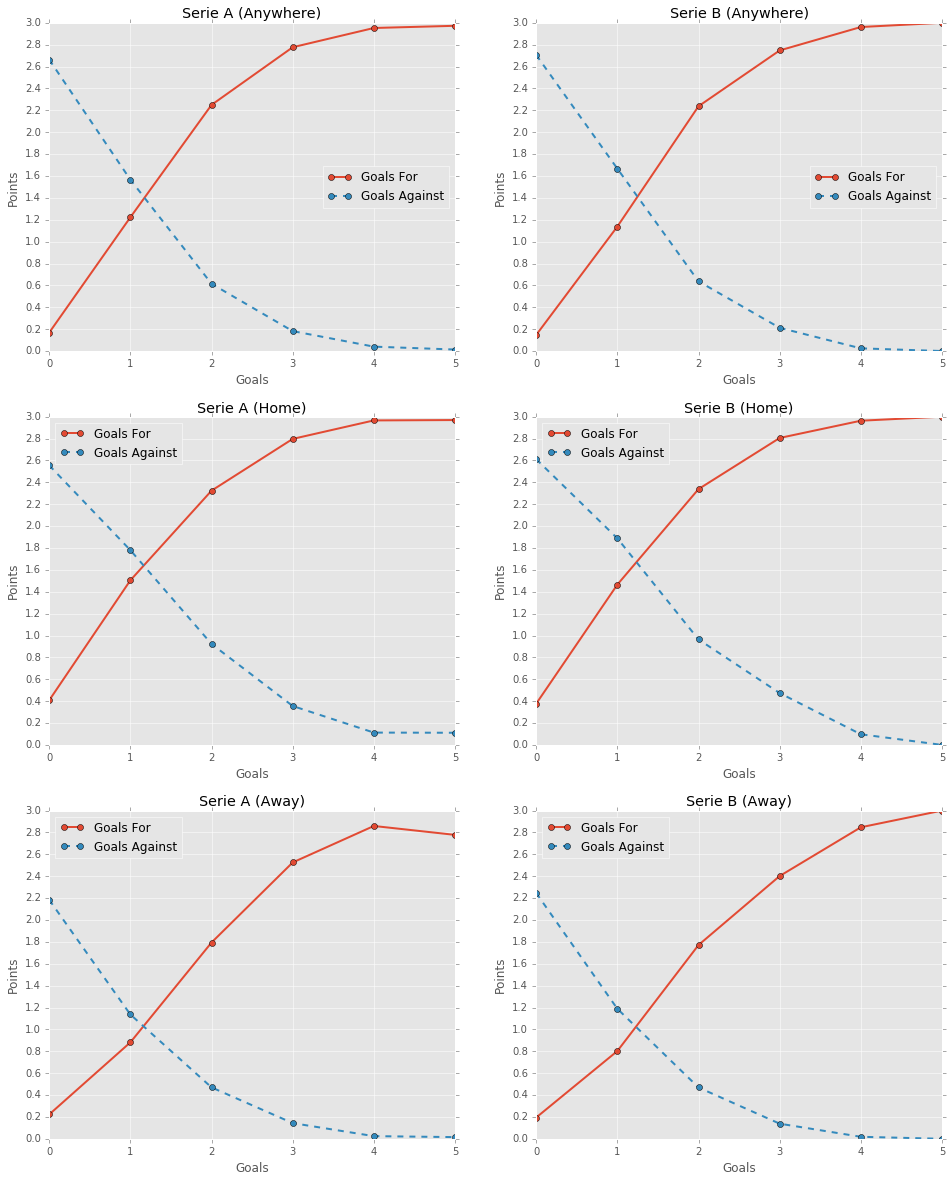

In [100]:
serieA =  pd.read_csv("csv/serieA_by_goals.csv") 
serieB =  pd.read_csv("csv/serieB_by_goals.csv") 
yticks = np.arange(0,3.1,0.2)
xticks = np.arange(0,6,1)

def plotAx(ax,df,title):
    ax.plot(df.iloc[:6, [0]],lw='2', marker='o')
    ax.plot(df.iloc[:6, [1]],ls='--', lw='2', marker='o')
    ax.set_xlabel('Goals')
    ax.set_ylabel('Points')
    ax.set_title(title)
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.legend(['Goals For','Goals Against'], loc='best')

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
fig.set_figwidth(16)
fig.set_figheight(20)


plotAx (ax1,serieA[['PPFT','PPAT']],'Serie A (Anywhere)')
plotAx (ax2,serieB[['PPFT','PPAT']],'Serie B (Anywhere)')
plotAx (ax3,serieA[['PPFH','PPAH']],'Serie A (Home)')
plotAx (ax4,serieB[['PPFH','PPAH']],'Serie B (Home)')
plotAx (ax5,serieA[['PPFA','PPAA']],'Serie A (Away)')
plotAx (ax6,serieB[['PPFA','PPAA']],'Serie B (Away)')

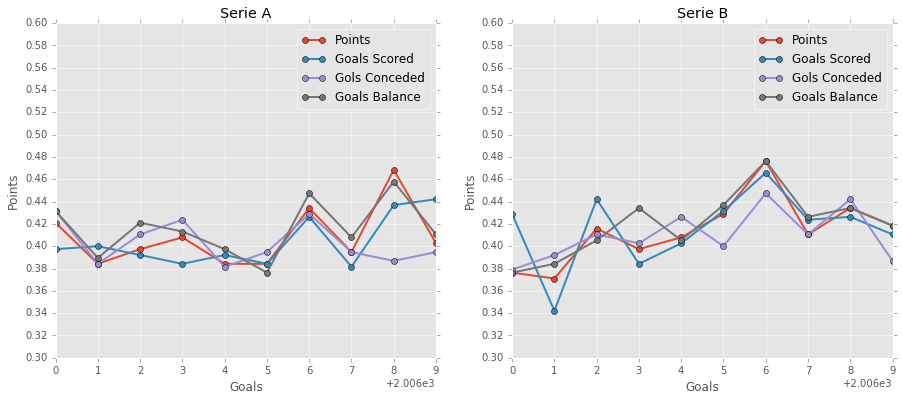

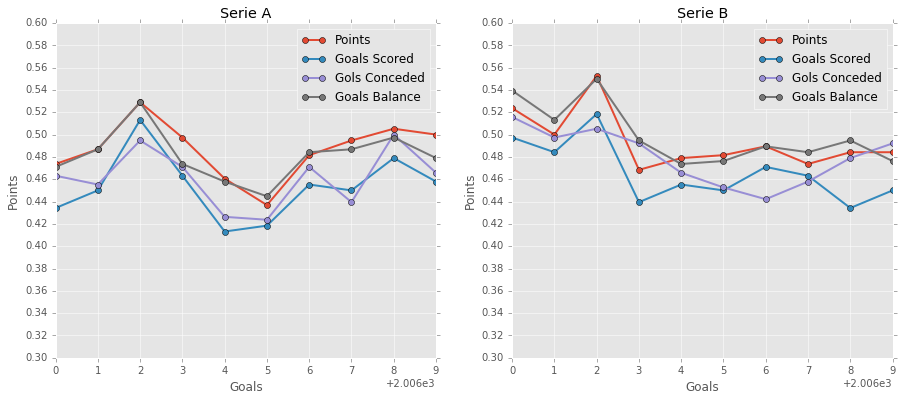

In [8]:
def plotAx(ax,df,title):
    
    ax.plot(df['RPTA'],lw='2',marker='o')
    ax.plot(df['RGFA'],lw='2',marker='o')
    ax.plot(df['RGAA'],lw='2',marker='o')
    ax.plot(df['RGD'],lw='2', marker='o')
    ax.set_xlabel('Goals')
    ax.set_ylabel('Points')
    ax.set_title(title)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.legend(['Points','Goals Scored','Gols Conceded','Goals Balance'], loc='best')

df = pd.read_csv("csv/bets_total.csv")
serieA = df[['RPTA','RGFA','RGAA','RGD']][df.CHAMP == 'serie-a'].groupby(df.YR).sum()
serieB = df[['RPTA','RGFA','RGAA','RGD']][df.CHAMP == 'serie-b'].groupby(df.YR).sum()

serieA = serieA / 380
serieB = serieB / 380

yticks = np.arange(0.3,0.62,0.02)
xticks = years

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(6)

plotAx (ax1,serieA,'Serie A')
plotAx (ax2,serieB,'Serie B')
plt.show()

df = pd.read_csv("csv/bets_local.csv")
serieA = df[['RPTA','RGFA','RGAA','RGD']][df.CHAMP == 'serie-a'].groupby(df.YR).sum()
serieB = df[['RPTA','RGFA','RGAA','RGD']][df.CHAMP == 'serie-b'].groupby(df.YR).sum()

serieA = serieA / 380
serieB = serieB / 380

yticks = np.arange(0.3,0.62,0.02)
xticks = years

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(6)

plotAx (ax1,serieA,'Serie A')
plotAx (ax2,serieB,'Serie B')
plt.show()

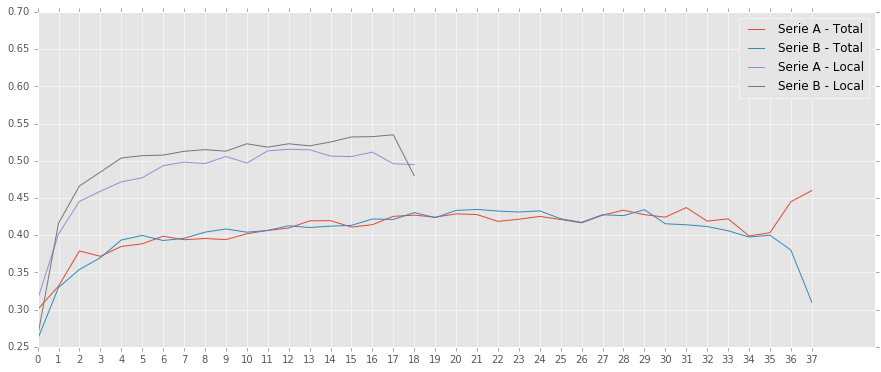

In [90]:
df = pd.read_csv("csv/resume_bets_total.csv")

xticks = np.arange(0,38,1)
yticks = np.arange(0.25,0.75,0.05)
fig, (ax1) = plt.subplots(1,1)
fig.set_figwidth(15)
fig.set_figheight(6)

df.head()

serieA = df[df['CHAMP'] == 'serie-a'].copy()
serieB = df[df['CHAMP'] == 'serie-b'].copy()

serieA = serieA['AVG_HITS'].groupby(df.LMN).mean()
serieB = serieB['AVG_HITS'].groupby(df.LMN).mean()
ax1.plot(serieA)
ax1.plot(serieB)

df = pd.read_csv("csv/resume_bets_local.csv")

df.head()

serieA = df[df['CHAMP'] == 'serie-a'].copy()
serieB = df[df['CHAMP'] == 'serie-b'].copy()


serieA = serieA['AVG_HITS'].groupby(df.LMN).mean()
serieB = serieB['AVG_HITS'].groupby(df.LMN).mean()

ax1.plot(serieA)
ax1.plot(serieB)

ax1.set_xticks(xticks)
ax1.set_yticks(yticks)

ax1.legend(['Serie A - Total','Serie B - Total','Serie A - Local','Serie B - Local'])

plt.show()

In [10]:
df = pd.read_csv("csv/resume_bets_local.csv")

serieA = df[df['CHAMP'] == 'serie-a'].copy()
serieB = df[df['CHAMP'] == 'serie-b'].copy()

serieA = serieA[['MP','CUM_ODDS']].groupby(df.LMN).sum()
serieA['PL'] = serieA.CUM_ODDS - serieA.MP
serieA['PP'] = serieA.PL / serieA.MP

print(serieA)

       MP  CUM_ODDS      PL        PP
LMN                                  
0     100    100.18    0.18  0.001800
1    3700   3325.52 -374.48 -0.101211
2    3598   3337.97 -260.03 -0.072271
3    3498   3071.69 -426.31 -0.121872
4    3399   2999.72 -399.28 -0.117470
5    3298   2914.77 -383.23 -0.116201
6    3196   2832.67 -363.33 -0.113683
7    3095   2690.50 -404.50 -0.130695
8    2993   2603.26 -389.74 -0.130217
9    2893   2494.46 -398.54 -0.137760
10   2792   2457.82 -334.18 -0.119692
11   2689   2375.01 -313.99 -0.116768
12   2588   2319.21 -268.79 -0.103860
13   2488   2261.58 -226.42 -0.091005
14   2388   2134.18 -253.82 -0.106290
15   2288   1988.33 -299.67 -0.130975
16   2185   1926.40 -258.60 -0.118352
17   2085   1896.68 -188.32 -0.090321
18   1986   1777.21 -208.79 -0.105131
19   1886   1677.00 -209.00 -0.110817
20   1787   1601.20 -185.80 -0.103973
21   1688   1525.57 -162.43 -0.096226
22   1591   1393.67 -197.33 -0.124029
23   1492   1310.70 -181.30 -0.121515
24   1392   

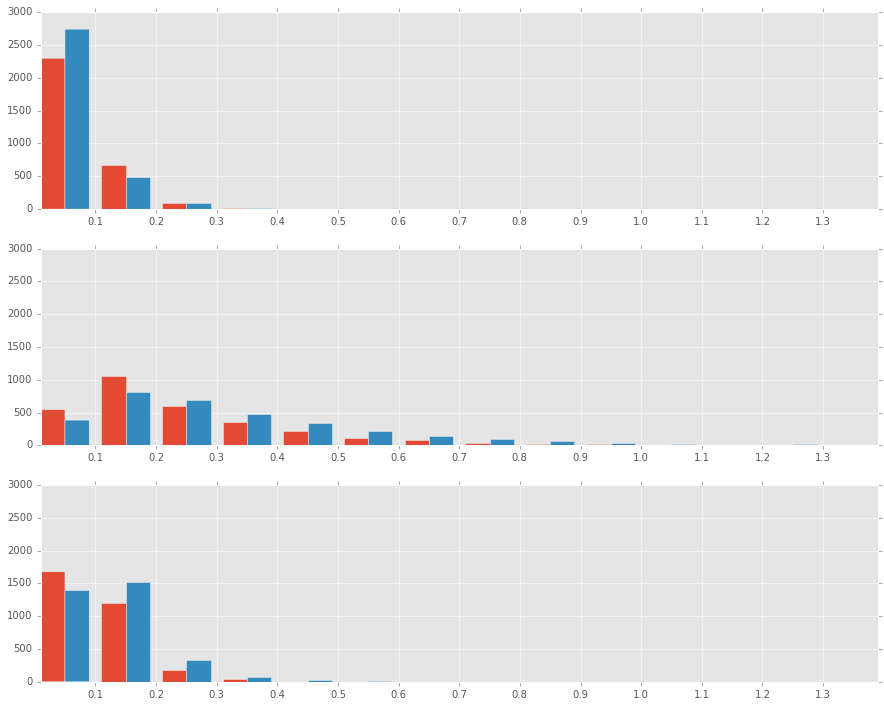

In [115]:
df = pd.read_csv("csv/stddev.csv")
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figwidth(15)
fig.set_figheight(12)

xticks = np.arange(0,1.5,0.1)
yticks = np.arange(0,3000,200)
ax1.set_xticks(xticks)
ax1.set_ylim((0,3000))
ax1.hist((df['HODD'][(df.HODD < 2) & (df.RSL_BET == 0)],\
          df['HODD'][(df.HODD < 2) & (df.RSL_BET == 1)]),histtype='bar', bins=xticks)


ax2.set_xticks(xticks)
ax2.set_ylim((0,3000))
ax2.hist((df['AODD'][(df.AODD < 2) & (df.RSL_BET == 0)],\
          df['AODD'][(df.AODD < 2) & (df.RSL_BET == 1)]),histtype='bar', bins=xticks)

ax3.set_xticks(xticks)
ax3.set_ylim((0,3000))
ax3.hist((df['DODD'][(df.DODD < 2) & (df.RSL_BET == 0)],\
          df['DODD'][(df.DODD < 2) & (df.RSL_BET == 1)]),histtype='bar', bins=xticks)

plt.show()